In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv('data/df_analise.csv').set_index('Data')
df.corr()

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Dolar,1.000000,-0.609966,-0.059586,-0.052480,-0.010008,-0.065864,-0.033522
IBOVESPA,-0.609966,1.000000,-0.112394,0.000066,-0.055380,0.030524,-0.143448
IPCA,-0.059586,-0.112394,1.000000,0.389653,0.369186,0.389130,0.967234
IGPM,-0.052480,0.000066,0.389653,1.000000,0.929280,0.925328,0.427384
IGPDI,-0.010008,-0.055380,0.369186,0.929280,1.000000,0.772087,0.399344
IGP10,-0.065864,0.030524,0.389130,0.925328,0.772087,1.000000,0.425475
INPC,-0.033522,-0.143448,0.967234,0.427384,0.399344,0.425475,1.000000


In [6]:
# Realizar o teste de Dickey-Fuller aumentado para todas as variáveis do DataFrame
for coluna in df.columns:
    print(f"Variável: {coluna}")
    resultado = adfuller(df[coluna], autolag='AIC')
    estatistica_adf, valor_p, lag_escolhido, _, valores_críticos, _ = resultado

    # Imprimir os resultados do teste, o lag escolhido e a conclusão para a variável atual
    print("Estatística ADF:", estatistica_adf)
    print("Valor-p:", valor_p)
    print("Lag Escolhido pelo autolag:", lag_escolhido)
    print("Valores Críticos:", valores_críticos)

    if valor_p < 0.05:
        print("Conclusão: Rejeitar a hipótese nula. A série é estacionária.")
    else:
        print("Conclusão: Não rejeitar a hipótese nula. A série não é estacionária.")
    print("-" * 50)  # Separador para cada variável

Variável: Dolar
Estatística ADF: -13.782556245801608
Valor-p: 9.238283636850272e-26
Lag Escolhido pelo autolag: 0
Valores Críticos: {'1%': np.float64(-3.467631519151906), '5%': np.float64(-2.8779183721695567), '10%': np.float64(-2.575501353364474)}
Conclusão: Rejeitar a hipótese nula. A série é estacionária.
--------------------------------------------------
Variável: IBOVESPA
Estatística ADF: -8.517489955740606
Valor-p: 1.1237646779356164e-13
Lag Escolhido pelo autolag: 3
Valores Críticos: {'1%': np.float64(-3.4682803641749267), '5%': np.float64(-2.8782017240816327), '10%': np.float64(-2.5756525795918366)}
Conclusão: Rejeitar a hipótese nula. A série é estacionária.
--------------------------------------------------
Variável: IPCA
Estatística ADF: -6.93326852148248
Valor-p: 1.0705243257919868e-09
Lag Escolhido pelo autolag: 0
Valores Críticos: {'1%': np.float64(-3.467631519151906), '5%': np.float64(-2.8779183721695567), '10%': np.float64(-2.575501353364474)}
Conclusão: Rejeitar a hipó

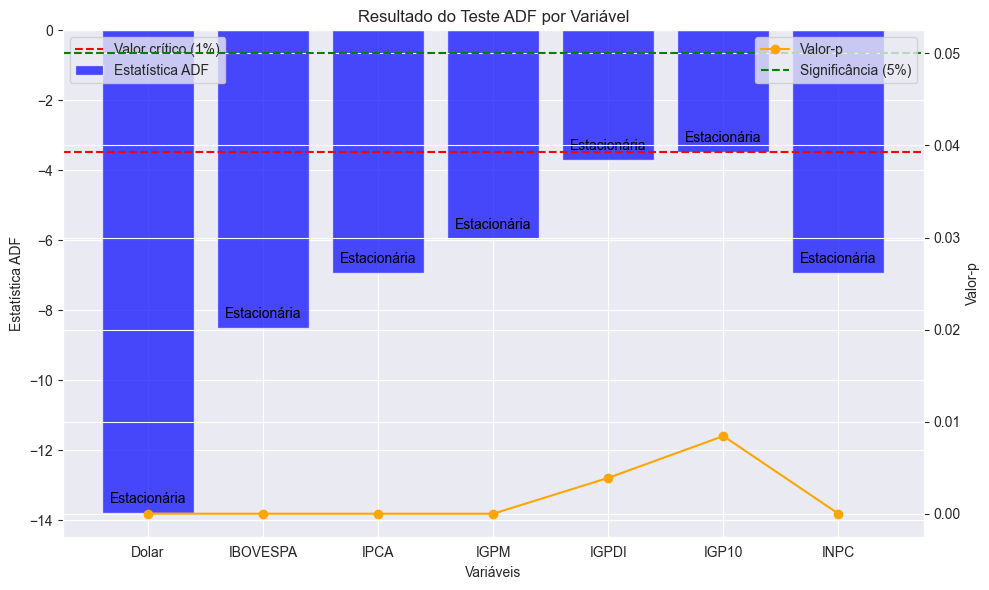

In [9]:
import matplotlib.pyplot as plt

# Criar listas para armazenar os resultados do teste
variaveis = df.columns
adf_stats = []
p_values = []

# Lista para armazenar as conclusões
conclusoes = []

for coluna in variaveis:
    resultado = adfuller(df[coluna], autolag='AIC')
    adf_stats.append(resultado[0])
    p_values.append(resultado[1])
    # Determinar a conclusão
    if resultado[1] < 0.05:
        conclusoes.append("Estacionária")
    else:
        conclusoes.append("Não Estacionária")

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para Estatística ADF
ax1.bar(variaveis, adf_stats, color='blue', alpha=0.7, label='Estatística ADF')
ax1.axhline(y=-3.4676, color='r', linestyle='--', label="Valor crítico (1%)")  # Valor crítico como exemplo
ax1.set_xlabel('Variáveis')
ax1.set_ylabel('Estatística ADF')
ax1.set_title('Resultado do Teste ADF por Variável')
ax1.legend(loc='upper left')

# Adicionar as conclusões acima das barras
for i, (val, conclu) in enumerate(zip(adf_stats, conclusoes)):
    ax1.text(i, val + 0.2, conclu, ha='center', va='bottom', fontsize=10, color='black')

# Gráfico de linha para Valor-p
ax2 = ax1.twinx()
ax2.plot(variaveis, p_values, color='orange', marker='o', label='Valor-p')
ax2.axhline(y=0.05, color='green', linestyle='--', label="Significância (5%)")
ax2.set_ylabel('Valor-p')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()